<a href="https://colab.research.google.com/github/olowu289/Deep-learning-machine-learning-project/blob/main/movies_reviews_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to anothe Natural Language processing workflow. During this project, we are going to be building a model that is able to calssify if a movie is either has a positive review or a nagative review. We will be using the tensorflow movies review datasets which has 50,000 reviews (25,000 for training, another 25,000 for testing.

What we are going to cover,
1. Load in our tensorflow dataset
2. Preprocess our dataset (converting our test to numbers throught process known as `Tokenization and Embedding`
3. Build 6 diffrent models
 1. Model 0. baseline model using Sklearn.
 2. model 1. Normal dense layer model
 3. model 3. Using LSTM layer
 4. model 4. using GRU layer
 5. model 5. Using RNN (recurrent nueral network)
 6. model 6. Using Transfer learning.
4. Finding the best model
5. Evaluation my best model
6. Saving and making predictions with my best model
7. Testing my best model with data from the wild
8. Saving and uploading to Github.

In [ ]:
# let import the useful liabaries 
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

In [ ]:
# let get our helper funtions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-06-29 16:20:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-29 16:20:09 (119 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# let load in our data set

train_data, test_data =tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNFQ9GH/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNFQ9GH/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNFQ9GH/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

note, tfds.as_numpy helps us to itrare through our dataset. read tesorflow guide for more info https://www.tensorflow.org/datasets/api_docs/python/tfds/as_numpy

In [ ]:
train_examples[4], train_labels[4]

(b'As others have mentioned, all the women that go nude in this film are mostly absolutely gorgeous. The plot very ably shows the hypocrisy of the female libido. When men are around they want to be pursued, but when no "men" are around, they become the pursuers of a 14 year old boy. And the boy becomes a man really fast (we should all be so lucky at this age!). He then gets up the courage to pursue his true love.',
 1)

### Becoming one with the data

let visualised our data

In [ ]:
# let look at the numbers of training and test samples that we have
print(f"The numbers of traning examples is {len(train_examples)}")
print(f"The numbers of test samples is {len(test_examples)}")
print(f"The numbers of traning lables is {len(train_labels)}")
print(f"The numbers of test lables is {len(test_labels)}")

The numbers of traning examples is 25000
The numbers of test samples is 25000
The numbers of traning lables is 25000
The numbers of test lables is 25000


In [ ]:
type(train_examples)

numpy.ndarray

In [ ]:
dataset = pd.DataFrame({'train_example': train_examples, 'train_lables':train_labels})
dataset

,train_example,train_lables
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1
...,...,...
24995,"b'I have a severe problem with this show, seve...",0
24996,"b'The year is 1964. Ernesto ""Che"" Guevara, hav...",1
24997,b'Okay. So I just got back. Before I start my ...,0
24998,b'When I saw this trailer on TV I was surprise...,0


In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_examples)-5) # create random indexes not higher than the total number of samples
for row in dataset[["train_example", "train_lables"]][random_index:random_index+5].itertuples():
  _,train_examples, train_labels = row
  print(f"Target: {train_labels}", "(positive)" if train_labels > 0 else "(nagative)")
  print(f"Text:\n{train_examples}\n")
  print("---\n")

Target: 0 (nagative)
Text:
b'A half-hearted attempt to bring Elvis Presley into the modern day, but despite a sexy little shower scene and a pseudo-Playboy magazine subplot, Presley is surrounded by the same old coy, winking clich\xc3\xa9s. A woman picks E.P. up on the beach and then proceeds to take over his life--and he doesn\'t seem to care! Dick Sargent is grueling in another sidebar, but Don Porter and Rudy Vallee (!) try hard as Elvis\' two bosses (he\'s moonlighting, you see). Some of the songs are quite good, especially "Almost in Love", but if you want to see a looser, hipper, updated Elvis sex-comedy--look elsewhere. When Elvis and his Fatal Attraction get into bed together, there\'s actually a wooden board in between them! Get real. ** from ****'

---

Target: 1 (positive)
Text:
b'This has long been one of my favourite adaptations of an Austen novel. Although it is definitely not in the same category as the spectacular "Pride and Prejudice," "Emma" is a lush and relatively f

In [ ]:
# let add the length of each dataset to the model, it will be useful
dataset['rewiew_lenght'] = dataset.train_example.apply(len)
dataset

,train_example,train_lables,rewiew_lenght
0,"b""This was an absolutely terrible movie. Don't...",0,709
1,b'I have been known to fall asleep during film...,0,617
2,b'Mann photographs the Alberta Rocky Mountains...,0,787
3,b'This is the kind of film for a snowy Sunday ...,1,464
4,"b'As others have mentioned, all the women that...",1,413
...,...,...,...
24995,"b'I have a severe problem with this show, seve...",0,2992
24996,"b'The year is 1964. Ernesto ""Che"" Guevara, hav...",1,972
24997,b'Okay. So I just got back. Before I start my ...,0,4230
24998,b'When I saw this trailer on TV I was surprise...,0,877


### Converting our text to numbers:

When working with nueral network, they prefer our text to be converted into numbers, and we will be using a process callled `Tokenization and Embeding`

In [ ]:
# impoeting text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# calculating the average number of token (words) in our training_example
max_lenght= round(sum(dataset["rewiew_lenght"])/len(dataset))
max_lenght

1325

In [ ]:
# Finding the maximum lenght of the 
# For this particular proble, i habe decided to keep at least 50% of the words in my train_examples
max_vocal_lenght=round(sum(dataset["rewiew_lenght"])/.50)
max_vocal_lenght= 30000

In [ ]:
text_vectorizer= TextVectorization(max_tokens=max_vocal_lenght,
                                   output_mode="int",
                                   output_sequence_length=max_lenght,
                                   )

In [ ]:
# now, we have to do this cause we have convert our train_example and train_lables into a pandas dataframe
train_examples= dataset["train_example"]
train_lables= dataset["train_lables"]

In [ ]:
# let adapt our text_vectorizer to our train_example
# note, its very important
text_vectorizer.adapt(train_examples)

In [ ]:
# Create a sample sentences and tokenized it
sampel_sentence= "There's a flood in my street!"
b=text_vectorizer([sampel_sentence])
b.shape

TensorShape([1, 1325])

In [ ]:
# now len pass a random sentence into our text_vectorizer and see the output
random_sentence= random.choice(train_examples)
# let pass our random sentence to our text vectorizer
vectorized_word= text_vectorizer([random_sentence])
# let print a nice output
print(f"Random sentence before passing it into our text_vectorizer layer \n {random_sentence}\n\n ")
print(f"Random sentence after passing it into our text_vecotrizer layer\n\n {[vectorized_word]} ")
print(f"Shape after appling text_vectorizer {vectorized_word.shape}")

Random sentence before passing it into our text_vectorizer layer 
 b"I rented this movie this past weekend, cranked up the surround sound system, and got some great sound from special affects. This movie is a great movie rental, the special affects where enough to scare my fiance, but I noticed some looked suprisingly computer generated. I didn't go to the movies and see this, but its a scary late night don't feel like going out movie. I would recommend it!"

 
Random sentence after passing it into our text_vecotrizer layer

 [<tf.Tensor: shape=(1, 1325), dtype=int64, numpy=array([[  10, 1536,   11, ...,    0,    0,    0]])>] 
Shape after appling text_vectorizer (1, 1325)


In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in 
top_5_words= words_in_vocab[:5] # get the 5  most common words
bottom_5_words= words_in_vocab[-5:]  # get the 5 least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least words: {bottom_5_words} ")

Number of words in vocab: 30000
5 most common words: ['', '[UNK]', 'the', 'and', 'a']
5 least words: ['ond345ej', 'oncoming', 'oncamera', 'omniscient', 'omitting'] 


### Creating text embeding using embeding layer.

Embeding are very import as it helps convert the numbers that oue text has been converted to into floating point value and can be updated during training. To know more check out https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

In [ ]:
# import keras layers
from tensorflow.keras.layers import Embedding

In [ ]:
embedding= Embedding(input_dim=max_vocal_lenght,# set input shape
                     output_dim= 128,
                     embeddings_initializer= "uniform", # default, it initialized our embeddings randomly 
                     input_length=max_lenght)

In [ ]:
# let pass our random sentence into our embedding layer
# now len pass a random sentence into our text_vectorizer and see the output
random_sentence= random.choice(train_examples)
# let pass our random sentence to our text vectorizer
vectorized_word= text_vectorizer([random_sentence])
# let no pass it into our embedding layer
embed= embedding(vectorized_word) # Note that i passed in the random senctence in to th embedding layer after it has been tokenized,
# it very important to note so 
# let print a nice output
print(f"Random sentence before passing it into our text_vectorizer layer \n {random_sentence}\n\n ")
print(f"Random sentence after passing it into our text_vecotrizer layer\n\n {[vectorized_word]}\n\n ")
print(f"Random sentence before passing it into our embedding layer \n {embed} ")
print(f"Shape of our random sentence after our embedding layer:\n  {embed.shape} ")

Random sentence before passing it into our text_vectorizer layer 
 b'For what it is, "Raising Victor Vargas" is about as close to perfection as a film can get. Either sheer genius from a fledgling auteur or just one of those lucky mixes where everything clicked (probably some of each), this simple little slice-of-urban-life ethnic first love flick fleshes out its young characters with such depth you can almost read their minds. The film begins with a strong flavor of "street" but works its way into a Latino family affair and then focuses on a story which speaks volumes about the uncertainty of youth and the profoundly natural desire to love another. In my experience, never has so much been done with so little (cast of tyros, novice director, etc.). Praised by the critics but not for everyone, "Raising Victor Vargas" is recommended for indie lovers and realists into simple tales rich in humanness. (A)'

 
Random sentence after passing it into our text_vecotrizer layer

 [<tf.Tensor: sha

### Model 0: baseline model.

For our baseline model, we will be using the sklearn and we will be able to figure our if our deep learning model can perforem better than our baseline model

We will be usint sklearn TfiedVectorizer https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
# impor the useful libaries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
train_labels

0

In [ ]:
# creating tokenization and embedding pilepline
model_0= Pipeline([
                   ("tfid", TfidfVectorizer()),# convert words to numbers using tfidf
                  ("clf",  MultinomialNB()) # model the text
])

# let fit our model
model_0.fit(train_examples, train_lables)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Let evaluate our base model
baseline_score=model_0.score(test_examples, test_labels)
print(f"Our baseline model was able to achive an accuracy of: {baseline_score*100 :.2f}")

Our baseline model was able to achive an accuracy of: 82.96


In [ ]:
# let make predictions with our base line model
baseline_model_pred_probs= model_0.predict(test_examples)
# Let view the first 10 predictions
baseline_model_pred_probs[:10]

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

### Creating an evaluation function for our model experiments

We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:
* Accuracy
* Precision
* Recall
* F1-score

> 🔑 **Note:** Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression problem, other metrics such as MAE (mean absolute error) would be a better choice.

In [ ]:
# let create a funtion that will calculate our models Accuracy, precision, Recall amd F1-score
# importing tne use full libaries
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def calculate_results(y_true, y_preds):
  """
  This funtion takes in the true prediction labels in our case (val_labes)
  and also a model_predictions and out put the Accuracy, Precision, Recall and F1_score of the model
  """
  # let calculate the accuracy of the model
  model_accuracy=accuracy_score(y_true, y_preds) * 100
  # let get our models precision, recall amd f1_score
  precision, recall, F1_score,_= precision_recall_fscore_support(y_true, y_preds, average="weighted")
  # let obtain our models result
  model_results= {"accuracy": model_accuracy,
                  "precision":precision,
                  "recall":recall,
                  "f1_score":F1_score}

  return model_results

In [ ]:
# let obtain our baseline model results
baseline_result= calculate_results(y_true=test_labels, y_preds=baseline_model_pred_probs)
baseline_result

{'accuracy': 82.956,
 'f1_score': 0.828953229782028,
 'precision': 0.8343036261758116,
 'recall': 0.82956}

well, looks like our baseline model 

### Model 1:A Simple Dence Model

In [ ]:
# let create tensorboard callbacks to track our models resuls
SAVE_DIR= "MOVIES_REVIEWS_USING_TENSORFLOW_MOVIES_DATASET"

from helper_functions import create_tensorboard_callback

In [ ]:
# We are going to be using the funtional API approch
from tensorflow.keras import layers
from tensorflow.keras import Model

inputs= layers.Input(shape= (1), dtype="string") # setting our input into a 1 dimesiona array and a dtype of string
x= text_vectorizer(inputs) # This layers as we have seen above will convert our input text into numbers 
print(f"shape of our inputs after our text_vectorizer layer {x.shape} ")
x= embedding(x) # this will convert each numbers from the text vectorizer into a floating point value and output a 128 dimetional vector
print(f"shape of our inputs after our embedding layer {x.shape} ")
x= layers.GlobalAveragePooling1D()(x) # it will condence the output from our embedding layer
print(f"shape of our inputs after our Global_max_popling layer {x.shape} ")
x= layers.Dropout(0.5)(x)
x= layers.Dense(16, activation="relu")(x) # our dense layer which will be use to extract features in our model
print(f"shape of our inputs after our Dense layer {x.shape} ")
output= layers.Dense(1, activation="sigmoid")(x)
model_1 = Model(inputs, output)

shape of our inputs after our text_vectorizer layer (None, 1325) 
shape of our inputs after our embedding layer (None, 1325, 128) 
shape of our inputs after our Global_max_popling layer (None, 128) 
shape of our inputs after our Dense layer (None, 16) 


** NOTE** It's important to always check thw shape of you inputs after each layers to aviod mistakes or you cam do a model.summary

In [ ]:
# let check the sumarry our our model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 1325)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1325, 128)         3840000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 16)                2064  

### Creating a funtion to compile and fit our models

Since we are going to be building a lot of models(7) and we will be compilling and fitting them the same way, how about we create a funtions that can do that

In [ ]:
# creating our compile and fit funtions
def compile_and_fit_model(model, train_examples, train_labels ,test_examples, test_labels, experiment_name, epochs):
  """
  This funtions takes in a model, compile and fit the model to our 
  test data

  Return:
   a compile and fit mode
  """
  model.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  
  # fit the model
  history_model=model.fit(train_examples,
                          train_labels,
                          epochs=epochs,
                          validation_data=(test_examples, test_labels),
                          callbacks= [create_tensorboard_callback(dir_name= SAVE_DIR,
                                                                  experiment_name=experiment_name)])
  return model, history_model

In [ ]:
train_lables

0        0
1        0
2        0
3        1
4        1
        ..
24995    0
24996    1
24997    0
24998    0
24999    1
Name: train_lables, Length: 25000, dtype: int64

In [ ]:
compile_and_fit_model(model_1, train_examples=train_examples, train_labels=train_lables, test_examples=test_examples, test_labels=test_labels, experiment_name="model_1_dense_model", epochs=5)

Saving TensorBoard log files to: MOVIES_REVIEWS_USING_TENSORFLOW_MOVIES_DATASET/model_1_dense_model/20220629-162141
Epoch 1/5
782/782 [==============================] - 15s 15ms/step - loss: 0.6303 - accuracy: 0.6472 - val_loss: 0.4675 - val_accuracy: 0.8312
Epoch 2/5
782/782 [==============================] - 11s 15ms/step - loss: 0.3606 - accuracy: 0.8530 - val_loss: 0.3229 - val_accuracy: 0.8724
Epoch 3/5
782/782 [==============================] - 10s 12ms/step - loss: 0.2627 - accuracy: 0.8977 - val_loss: 0.2907 - val_accuracy: 0.8851
Epoch 4/5
782/782 [==============================] - 9s 12ms/step - loss: 0.2193 - accuracy: 0.9154 - val_loss: 0.2773 - val_accuracy: 0.8903
Epoch 5/5
782/782 [==============================] - 11s 15ms/step - loss: 0.1852 - accuracy: 0.9297 - val_loss: 0.2893 - val_accuracy: 0.8862


(<keras.engine.functional.Functional at 0x7f7131ef0810>,
 <keras.callbacks.History at 0x7f70acedaf90>)

Wow, looks like our model_1 finish up with a nice accuarcy than our baseline model. let make predictions with our model

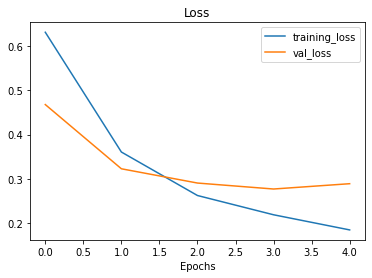

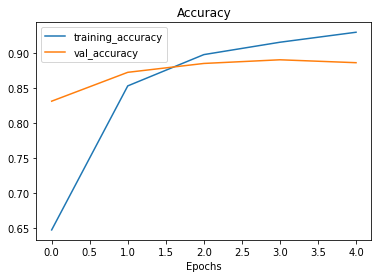

In [ ]:
# let plot our model's loss curve
from helper_functions import plot_loss_curves
plot_loss_curves(model_1.history)

In [ ]:
# let make predictions with our model
model_1_pred_probs= model_1.predict(test_examples)
# let view the first 10 prediction
model_1_pred_probs[:10]

array([[0.6256658 ],
       [0.815474  ],
       [0.00234899],
       [0.01182713],
       [0.9250387 ],
       [0.9791524 ],
       [0.99703276],
       [0.9908619 ],
       [0.60702103],
       [0.55389917]], dtype=float32)

We have a prediction probability between 0 and 1 whcich ia as a result of our sigmoid activation funtion from our output layer

In [ ]:
model_1_pred= tf.round(tf.squeeze(model_1_pred_probs)) # this will round up our prediction to either 0 or 1 an also squeeze the shape of our prediction to a 1 dimensional arrar
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# let obtain our models result
model_1_results=calculate_results(y_true= test_labels, y_preds=model_1_pred)
model_1_results

{'accuracy': 88.616,
 'f1_score': 0.8860161900008447,
 'precision': 0.8881187115602467,
 'recall': 0.88616}

In [ ]:
baseline_result

{'accuracy': 82.956,
 'f1_score': 0.828953229782028,
 'precision': 0.8343036261758116,
 'recall': 0.82956}

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_result, 
                                new_model_results=model_1_results)

Baseline accuracy: 82.96, New accuracy: 88.62, Difference: 5.66
Baseline precision: 0.83, New precision: 0.89, Difference: 0.05
Baseline recall: 0.83, New recall: 0.89, Difference: 0.06
Baseline f1_score: 0.83, New f1_score: 0.89, Difference: 0.06


well, looks like our model_1 outperform our baseline model in all metric of eveluation.

we still have 6 more models to go, lets do it